In [9]:
import pandas as pd
import pathlib as Path
import string
from nltk.tokenize.treebank import TreebankWordDetokenizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import urllib
import requests

In [4]:
CSV_FILE = "sts_gold_tweet.csv"
TXT_FILE = "Chapter4.txt"

df_tweets = pd.read_csv(CSV_FILE, delimiter=";")
file=open(TXT_FILE, mode="r", encoding="utf8")
ch4_raw = file.read()
file.close()

In [5]:
df_tweets.head()

,id,polarity,tweet
0,1467933112,0,the angel is going to miss the athlete this we...
1,2323395086,0,It looks as though Shaq is getting traded to C...
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH
3,1990283756,0,drinking a McDonalds coffee and not understand...
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...


In [7]:
df_tweets=df_tweets.iloc[1750:]
corpus_split = list(df_tweets["tweet"])

In [11]:
def concatenate_list_data(lis):
    result = ""
    for element in lis:
        result += str(element)
    
    return result

In [15]:
corpus_twitter = concatenate_list_data(corpus_split)
print(corpus_twitter[:1000])

I wish i was going to a Taylor Swift concert this summer...Sigh.. @taylorswift13 please come back to australia taylor!!! i missed going to sydney concert as i was sick with bronchitis I really need to stop checking my Facebook every 3 seconds hoping there's a message from Kyle Up for DMB, dr., then slept all day. Have a fever, no big deal, but Dad couldn't come down tonight.  Here's hoping for next weekend!@Kianasaurus - Bear just crunched my leg @sanasaleem should have turned me into muffin No C&amp;O youtube video.    At least not today.@rjman23 waiting for the iPod touch 3.0 jailbreak for pc to come out....itouch4life said it's not gonna be out today @TikkaMadsen @gogomago what are you two up to?  Ah shit, Miguel's gone?   I wonder if he blames Obama for Twitter, LOL...Well there goes my hope of seeing a lebron-kobe faceoff in the finals... Good riddance &amp; good nite It's not fair no one I like tours England Doing homework  cannot be bothered. Putting my PSP on ebay as i don't ne

In [16]:
ch4_raw = ch4_raw.split()
corpus_twitter = corpus_twitter.split()

In [17]:
import string

table = str.maketrans("", "", string.punctuation)

stripped_ch4 = [w.translate(table) for w in ch4_raw]
stripped_twitter = [w.translate(table) for w in corpus_twitter]

In [19]:
string_ch4 = " "
string_twitter = " "

string_ch4 = string_ch4.join(stripped_ch4)
string_twitter = string_twitter.join(stripped_twitter)

In [20]:
stop_words=set(stopwords.words("english"))

word_tokens_ch4 = word_tokenize(string_ch4)
word_tokens_twitter = word_tokenize(string_twitter)

In [21]:
filtered_corpus_ch4 = [w for w in word_tokens_ch4 if not w in stop_words]
filtered_corpus_twitter = [w for w in word_tokens_twitter if not w in stop_words]

In [23]:
wordfreq_ch4=[filtered_corpus_ch4.count(p) for p in filtered_corpus_ch4]
result_ch4 = dict(zip(filtered_corpus_ch4,wordfreq_ch4))
wordfreq_twitter=[filtered_corpus_twitter.count(p) for p in filtered_corpus_twitter]
result_twitter = dict(zip(filtered_corpus_twitter,wordfreq_twitter))

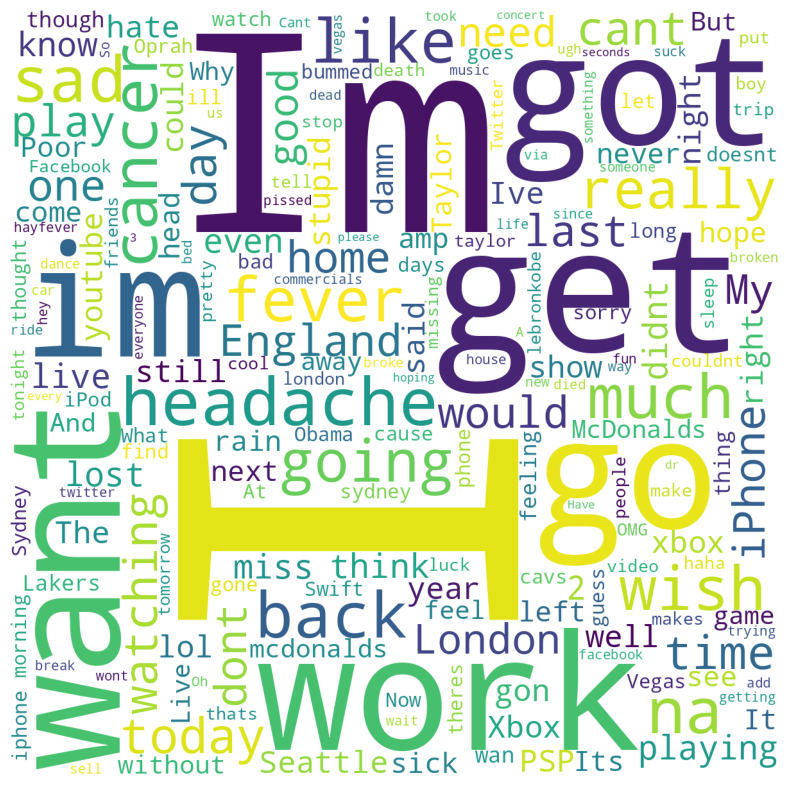

In [24]:
wordcloud=WordCloud(width=1200,
                    height=1200,
                    background_color="white",
                    min_font_size=10).generate_from_frequencies(result_twitter)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()

plt.show()

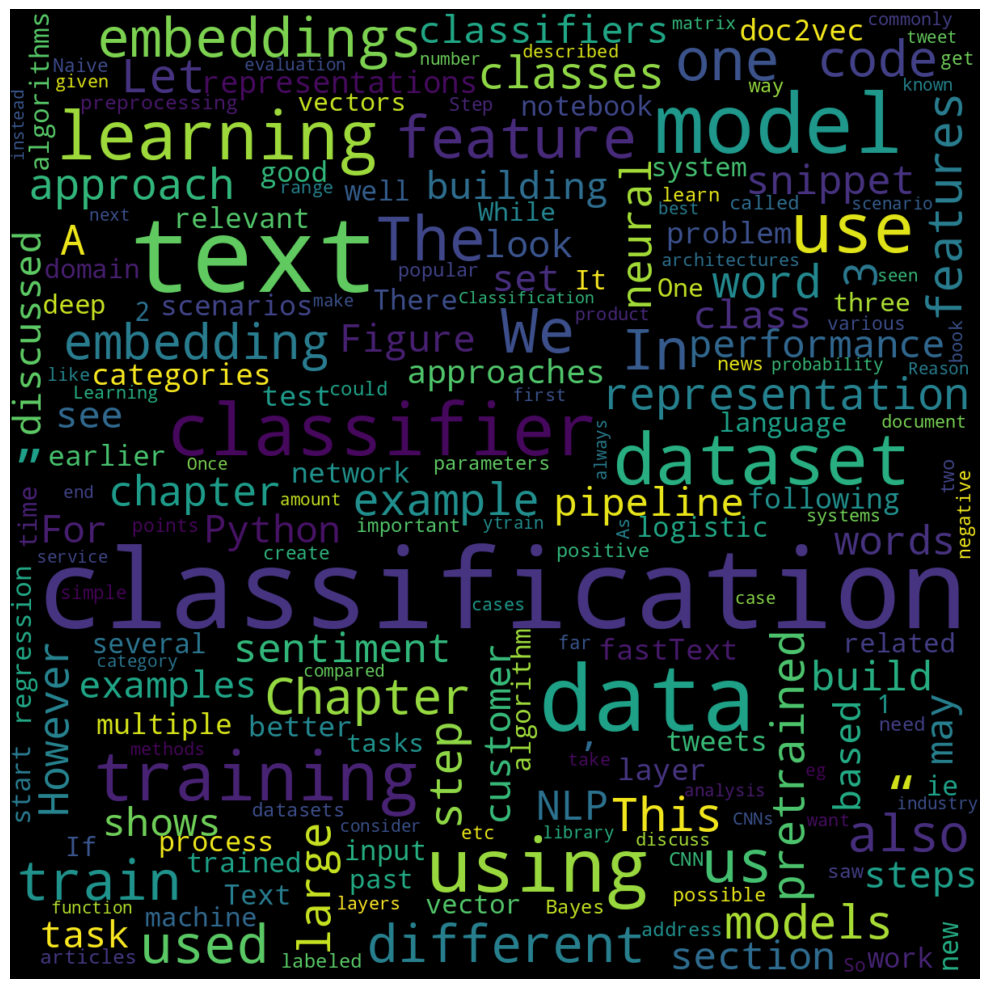

In [25]:
wordcloud = WordCloud(width = 1200, height = 1200, min_font_size =10).generate_from_frequencies(result_ch4)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout() 
  
plt.show()